In [84]:
import os
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
from skimage.filters import threshold_local

In [3]:
def load_image(image_path):
    image = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    return image

In [4]:
def grayscale(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.imshow(cv2.cvtColor(gray_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    return gray_image

In [101]:
def binarize(image, threshold=120):
    # _, binary_image = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    T = threshold_local(image, 15, offset=15, method="gaussian")
    binary_image = (image > T).astype("uint8")*255
    plt.imshow(cv2.cvtColor(binary_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    return binary_image

In [87]:
def noise_removal(image):
    print('noise_removal')
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.dilate (image, kernel, iterations=1)
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.erode (image, kernel, iterations=1)
    image = cv2.morphologyEx (image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur (image, 3)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    return (image)

In [88]:
def thick_font(image):
    image = cv2.bitwise_not(image)
    kernel = np.ones((1,1), np. uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    return (image)

In [89]:
def thin_font(image):
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2), np. uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    return (image)

In [103]:
def apply_ocr(image):
    pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
    os.environ['PATH'] += r';C:\Program Files\Tesseract-OCR'
    custom_config = r'--oem 1 --psm 1 -l rus'
    # custom_config = r'-l rus --oem 1 --psm 7'
    # custom_config = r'--psm 6 --oem 3 preserve_interword_spaces=1'
    return pytesseract.image_to_string(image, config=custom_config)

In [91]:
def pricess(image_path, transformations):
    image = load_image(image_path)
    transformed_image = image.copy()
    
    for transform in transformations:
        if transform == 'gs':
            transformed_image = grayscale(transformed_image)
        if transform == 'bin':
            transformed_image = binarize(transformed_image)
        if transform == 'nr':
            transformed_image = noise_removal(transformed_image)
        if transform == 'thick':
            transformed_image = thick_font(transformed_image)
        if transform == 'thin':
            transformed_image = thin_font(transformed_image)
    
    text = apply_ocr(transformed_image)
    
    return text

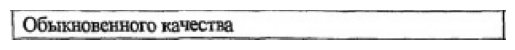

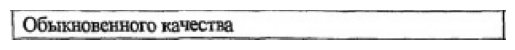

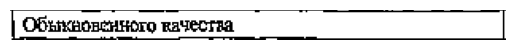

text:
| Объжвовеиного качества.




In [104]:
image_path = "pic.jpg"
# selected_transformations = ['gs', 'bin', 'nr', 'thick', 'thin']
selected_transformations = ['gs','bin']

recognized_text = pricess(image_path, selected_transformations)
print("text:")
print(recognized_text)